### "StatQuest: Principal Component Analysis, Josh Starmer" [바로 보기](https://www.youtube.com/watch?v=FgakZw6K1QQ)

# Principal Component Analysis(PCA, 주성분 분석)

1. 주성분 분석은 차원축소를 위해 사용됨  
   --> 고차원의 데이터를 저차원의 데이터로 변환
   
   - 목적
     - 차원(dimension)을 감소시켜 해석을 용이하게 하고, 시각화에 도움
     
   - 기대효과
     - 통계 : 적은 수의 특성으로 특정 현상을 설명
     - 머신러닝 : 모델 성능 강화
     
     

2. 개념
   - 여러개의 양적 변수들 사이의 분선-공분산(covariance) 관계를 이용하여,
   - 변수들의 선형결합으로 표시되는 주성분을 찾음(축의 개념)
   - 2-3개의 주성분으로 전체 분산(variance)의 대부분을 설명하고자 하는  
     다변량 분석법
   - 원 데이터의 손실을 최소화하면서 데이터를 잘 설명할 수 있는  
     변수들의 선형 조합을 찾는 것이 목표

$${ Cov(X,Y) = E[(X-\mu_X)(Y-\mu_Y)] = \sigma_{XY} }$$ 
$${ Corr(X,Y) = {\sigma_{XY}\over \sigma_X \sigma_Y} }$$

![pca](./pca.PNG)

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
lamen = dict({'name':['쇠고기라면','해물라면','얼큰라면',
                      '떡라면','짬뽕라면','만두라면','치즈라면',
                      '된장라면','볶음라면','김치라면'],
              'noodle':[2,1,5,2,3,4,4,1,3,5],
              'bowl':[4,5,3,2,5,3,4,2,3,5],
              'soup':[5,1,4,3,5,2,3,1,2,3]})

In [4]:
lamen1 = pd.DataFrame(lamen)
lamen1

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


### How StandardScaler works?

In [5]:
noodle_sd = np.std(lamen1['noodle'])
noodle_mean = np.mean(lamen1['noodle'])

In [7]:
a = []
for i in range(len(lamen1['noodle'])):
    a.append((lamen1['noodle'][i] - noodle_mean)/noodle_sd)

### StadardScaler 적용

1. 데이터 분리

In [17]:
lamenEval = lamen1[['noodle','bowl','soup']]
lamenName = lamen1['name']

2. 스케일러로 값 변환 

In [18]:
# scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled = scaler.transform(lamenEval.values)

lamen_scaled.shape

(10, 3)

In [19]:
lamen_scaled

array([[-0.70710678,  0.3592106 ,  1.52752523],
       [-1.41421356,  1.25723711, -1.38204664],
       [ 1.41421356, -0.53881591,  0.80013226],
       [-0.70710678, -1.43684242,  0.0727393 ],
       [ 0.        ,  1.25723711,  1.52752523],
       [ 0.70710678, -0.53881591, -0.65465367],
       [ 0.70710678,  0.3592106 ,  0.0727393 ],
       [-1.41421356, -1.43684242, -1.38204664],
       [ 0.        , -0.53881591, -0.65465367],
       [ 1.41421356,  1.25723711,  0.0727393 ]])

3. PCA 모델링
 
 - PCA.fit() : 주성분을 찾음
 
 - PCA.transform() : 새로운 주성분으로 데이터 변환

In [20]:
from sklearn.decomposition import PCA

In [21]:
# PCA modelling
pca_lamen = PCA()
pca_lamen.fit(lamen_scaled)

# data trasformation
X_pca_lamen = pca_lamen.transform(lamen_scaled)

# look into data shape
print("original data: {}".format(str(lamen_scaled.shape)))
print("deducted data: {}".format(str(X_pca_lamen.shape)))

original data: (10, 3)
deducted data: (10, 3)


4. 변환된 데이터 확인

In [22]:
X_pca_lamen

array([[-0.75045146,  0.54986707,  1.44804503],
       [ 1.02673873,  1.99341604, -0.68029269],
       [-1.03344902, -1.36473856,  0.00244833],
       [ 1.10826926, -0.71479113,  0.91138358],
       [-1.62344488,  0.83152952,  0.76613567],
       [ 0.29164279, -0.78379531, -0.72076585],
       [-0.63771758, -0.15146621, -0.45243513],
       [ 2.43336106, -0.13384787,  0.1881694 ],
       [ 0.69576209, -0.3563698 , -0.32834386],
       [-1.51071099,  0.13019625, -1.13434448]])

In [12]:
pca_lamen.components_

array([[-0.571511  , -0.52211611, -0.63306393],
       [-0.60447096,  0.78960694, -0.105526  ],
       [-0.5549685 , -0.32235949,  0.76687308]])

## PCA component에 관하여
$${X_{PCA} = X_{std}*PCA_{components}^T}$$

In [48]:
# np.round(np.dot(lamen_scaled,pca_lamen.components_.T),10)==np.round(X_pca_lamen,10)

5. biplot

In [83]:
pca_lamen.components_.shape

(3, 3)

In [123]:
def biplot2(score,coeff,label, pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    
    for i in range(len(xs)):
        plt.scatter(xs[i]*scalex, ys[i]*scaley)
        plt.annotate(label.iloc[i],
                     xy=(xs[i]*scalex,ys[i]*scaley), ha='right')

    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], 
                  coeff[i,pca2],color='r',alpha=1) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, 
                     coeff[i,pca2] * 1.15, "Var"+str(i+1), 
                     color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, 
                     coeff[i,pca2] * 1.15, labels[i],
                     color='g', ha='center', va='center',
                     size=15)
    plt.xlim(-0.8,0.75)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

In [101]:
### 한글 폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

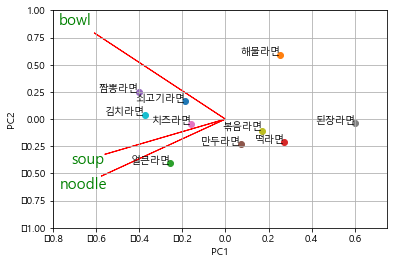

In [176]:
%matplotlib inline
biplot2(X_pca_lamen, pca_lamen.components_, 
        lamenName, 1,2, labels = lamenEval.columns)


**[해석]**

- 면과 국물의 축이 가까우므로 둘 사이에 비교적 강한 양의 상관관계가 있다.
- 그릇은 나머지 변수와 비교적 상관관계가 적다(같은 방향 : 약한 양의 상관관계)


- 얼큰라면은 나머지 변수에 비해 면에서 높은 점수를 받았다
- 짬뽕라면과 김치라면은 전체적으로 점수가 높을 것이며, 짬뽕라면은 그릇의 점수도 높을 것
- 해물라면은 면, 국물과 반대방향이므로 음의 상관관계가 있다. 반면, 그릇의 점수는 상당히 높을 것


- 된장라면은 그릇의 점수가 낮을 것이며, 면과 국물의 점수 역시 낮을 것이다.
- 볶음, 만두, 떡은 전체적으로 점수가 고르며 큰 특성을 보이지 않을 것

In [29]:
print(pca_lamen.components_)
print(lamenEval.columns)

[[-0.571511   -0.52211611 -0.63306393]
 [-0.60447096  0.78960694 -0.105526  ]
 [-0.5549685  -0.32235949  0.76687308]]
Index(['noodle', 'bowl', 'soup'], dtype='object')


In [30]:
lamen1

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


### [scree plot]

In [129]:
pca_lamen.explained_variance_ratio_

array([0.52428462, 0.27133611, 0.20437927])

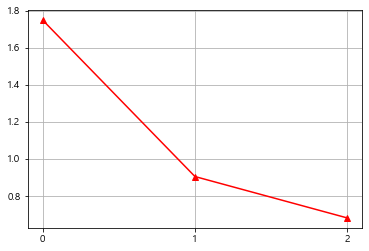

In [128]:
plt.xticks(range(len(pca_lamen.explained_variance_)))

plt.plot(pca_lamen.explained_variance_,marker='^',c='red')
plt.grid()

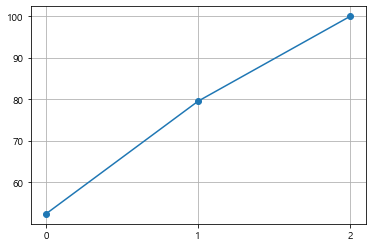

In [32]:
cumVar = np.cumsum(np.round(pca_lamen.explained_variance_ratio_,
                            decimals=4)*100)

plt.xticks(range(len(pca_lamen.explained_variance_)))

plt.plot(cumVar, marker='o')
plt.grid()

In [33]:
pca_lamen.explained_variance_ratio_

array([0.52428462, 0.27133611, 0.20437927])

### [breast cancer data]

- PCA가 가장 널리 사용되는 분야 중 하나는 고차원 데이터 셋의 시각화
- 이 데이터와 같이 특성이 많은 데이터들은 시각화로 데이터의 특성을  
  살펴보는 것이 불가능
- iris 데이터에서 해보았듯이 산점도 행렬로 볼 수 있겠으나,
- 이 데이터에서는 30개의 특성에 대해 산점도 행렬을 그려도 특성을  
  보기는 어렵다
- 2차원에 표현해 볼 수 있는 한가지 방법은 두 클래스(악성, 양성)에 대해  
  각 특성별로 히스토그램을 그려보는 것

- #### cancer data 특성별 히스토그램

In [164]:
a = range(200)
c,d = np.histogram(a,bins=50)

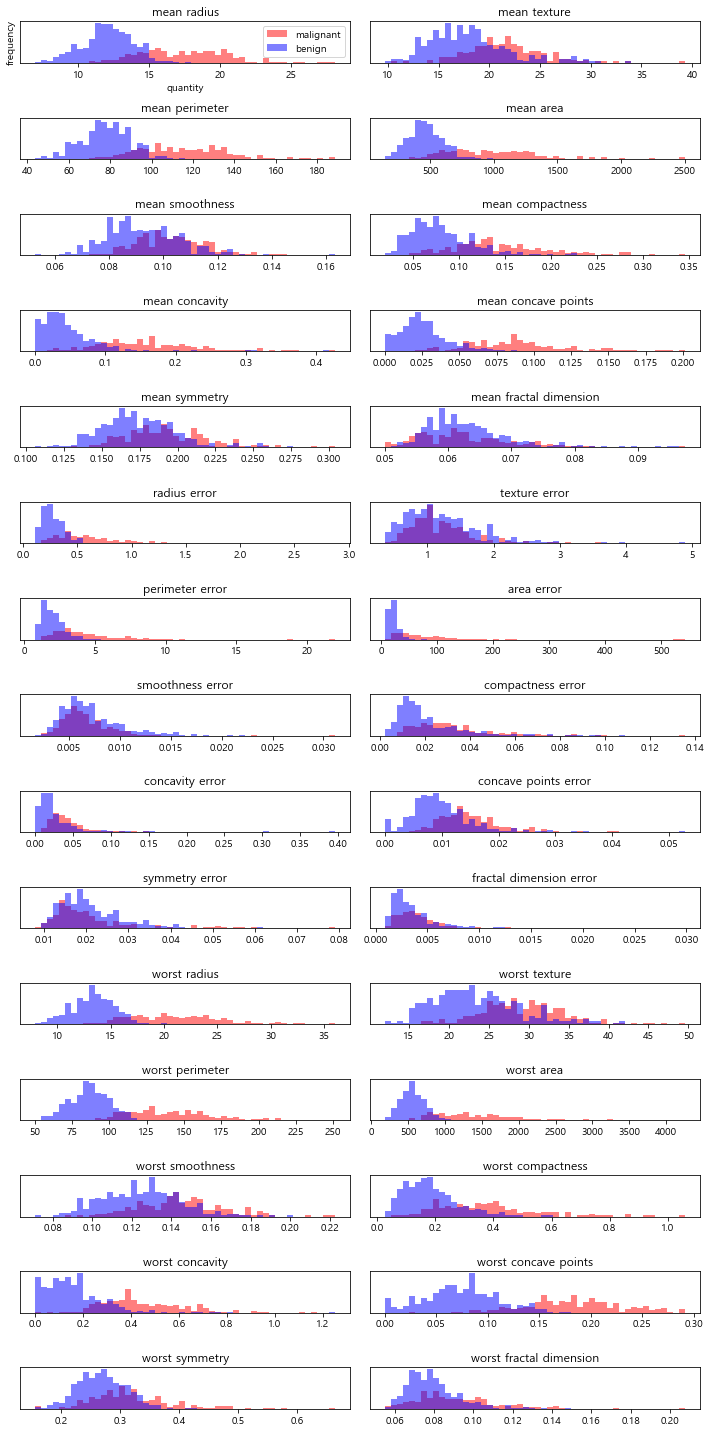

In [165]:
cancer = datasets.load_breast_cancer()

%matplotlib inline
fig, axes = plt.subplots(15,2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color = 'red', alpha=0.5)
    ax[i].hist(benign[:,i], bins=bins, color = 'blue', alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("quantity")
ax[0].set_ylabel("frequency")
ax[0].legend(['malignant','benign'], loc="best")
fig.tight_layout()

- ### PCA 적용
  - StandardScaler를 사용해 각 특성의 분산이 1이 되도록 정규화

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [167]:
# load data
cancer = datasets.load_breast_cancer()

# scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# PCA modelling
pca_cancer = PCA()
pca_cancer.fit(X_scaled)

# data trasformation
X_pca_cancer = pca_cancer.transform(X_scaled)

# look into data shape
print("original data: {}".format(str(X_scaled.shape)))
print("deducted data: {}".format(str(X_pca_cancer.shape)))

original data: (569, 30)
deducted data: (569, 30)


No handles with labels found to put in legend.


Text(0, 0.5, 'PC2')

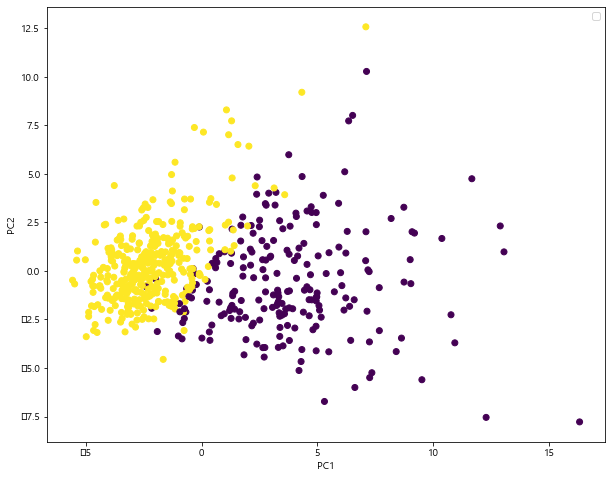

In [177]:
# 클래스 구분하여 처음 2개의 주성분에 나타냄

plt.figure(figsize = (10,8))
plt.scatter(X_pca_cancer[:,0], X_pca_cancer[:,1], 
            c = cancer.target)
plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [169]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())

    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',
                  alpha=1) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15,
                     "Var"+str(i+1), 
                     color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i],
                     color='g', ha='center', va='center', size=15)
    plt.xlim(-0.6,0.75)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

In [170]:
X_pca_cancer[0].shape

(30,)

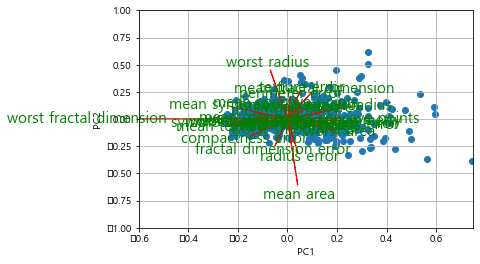

In [182]:
%matplotlib notebook
%matplotlib notebook
%matplotlib inline

biplot(X_pca_cancer, pca_cancer.components_,1,2, 
       labels = cancer.feature_names)

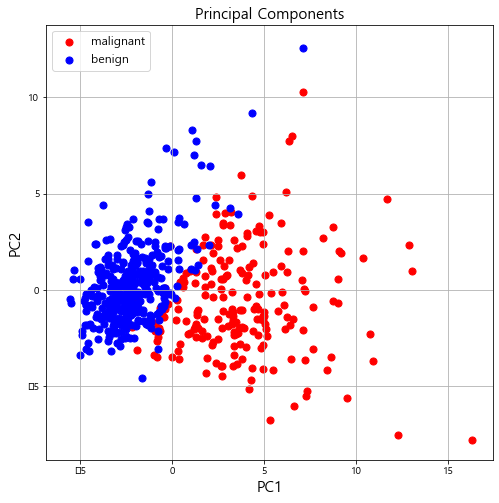

In [183]:
fig, axes = plt.subplots(1,1,figsize=(8,8))

#%matplotlib inline
#%matplotlib inline

targets = [0,1]
colors = ['r','b']

for target, color in zip(targets, colors):
    indicesToKeep = cancer.target == target
    axes.scatter(X_pca_cancer[indicesToKeep,0],
                 X_pca_cancer[indicesToKeep,1],
                 c = color, s = 50)

axes.set_xlabel('PC1', size = 15)
axes.set_ylabel('PC2', size = 15)
axes.set_title("Principal Components", size = 15 )
axes.legend(['malignant','benign'], fontsize = 12, loc=2)
axes.grid()


Text(0, 0.5, 'Principal Components')

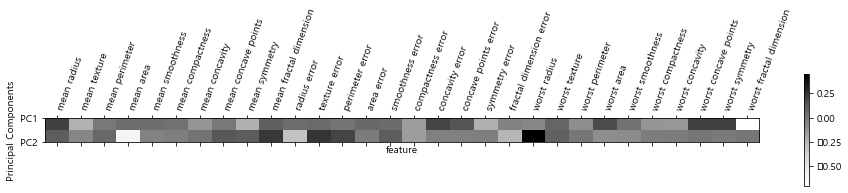

In [114]:
# 첫 두개 주성분에 대한 가중치 확인

plt.matshow(pca_cancer.components_[:,0:2].T, cmap = 'Greys')
plt.yticks([0,1],["PC1","PC2"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation = 70, ha='left')
plt.xlabel('feature')
plt.ylabel('Principal Components')

## scree plot

In [12]:
pca_cancer.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

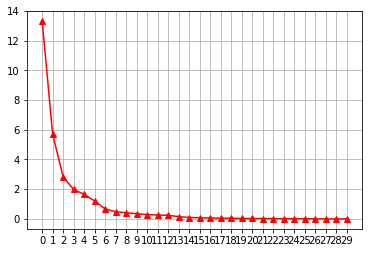

In [13]:
plt.xticks(range(len(pca_cancer.explained_variance_)))

plt.plot(pca_cancer.explained_variance_,marker='^',c='red')
plt.grid()

In [14]:
var1 = np.cumsum(np.round(pca_cancer.explained_variance_ratio_, decimals=4)*100)

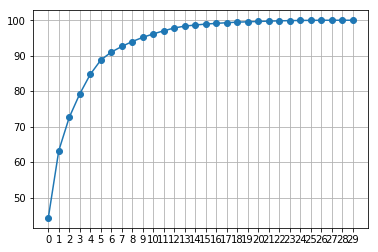

In [15]:
plt.xticks(range(len(pca_cancer.explained_variance_)))

plt.plot(var1, marker='o')
plt.grid()

### [7개 주성분 선택]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
# load data
cancer = datasets.load_breast_cancer()

# scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# PCA modelling
pca_cancer7 = PCA(n_components=7)
pca_cancer7.fit(X_scaled)

# data trasformation
X_pca_cancer7 = pca_cancer7.transform(X_scaled)

# look into data shape
print("original data: {}".format(str(X_scaled.shape)))
print("deducted data: {}".format(str(X_pca_cancer7.shape)))

original data: (569, 30)
deducted data: (569, 7)


In [44]:
X_pca_cancer[0][:7]

array([ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012,
        1.41142445,  2.15936987])

In [45]:
X_pca_cancer7[0]

array([ 9.19283683,  1.94858307, -1.12316617,  3.63373092, -1.19511006,
        1.41142483,  2.15935637])

In [47]:
np.round(X_pca_cancer[0][:7],3) == np.round(X_pca_cancer7[0],3)

array([ True,  True,  True,  True,  True,  True,  True])

1. 로지스틱 리그레션

< PCA 전 >

In [18]:
# 1. 데이터 불러오기

cancer = datasets.load_breast_cancer()

# 2. 데이터 분할 - 이항분류

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# 3. modelling

logreg = LogisticRegression().fit(X_train, y_train)
logreg

# 4. 결과 비교

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

# 5. parameter tuning

logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
logreg001

logreg1000 = LogisticRegression(C = 100).fit(X_train, y_train)
logreg1000

훈련 세트 점수: 0.963
테스트 세트 점수: 0.939


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

< PCA 후 >

In [19]:
X_train_pca, X_test_pca, y_train, y_test =\
train_test_split(X_pca_cancer7, y, test_size = 0.2, random_state = 10)

In [20]:
# 3. modelling

logreg_pca = LogisticRegression().fit(X_train_pca, y_train)
logreg_pca

# 4. 결과 비교

print("훈련 세트 점수: {:.3f}".format(logreg_pca.score(X_train_pca, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg_pca.score(X_test_pca, y_test)))

훈련 세트 점수: 0.974
테스트 세트 점수: 0.965


### [Note]

- 위와 같이 주성분 분석을 모델의 성능 향상에 사용할 수 있다.
- 데이터를 대부분 설명하는 -일반적으로 80% 이상- 주성분을 추출해내면,  
  결론적으로 모델의 훈련시 feature의 수가 줄어드는 효과가 있고,  
  주성분의 특성상 데이터를 가장 잘 설명하는 축을 만들어낸 것이기 때문.


- <u>**하지만**</u>, **7개의 주성분이 무엇을 의미하는지 정확하게 설명하기 어려운 단점이 있다.**

# [ <u>K-Means Clustering</u> ]

- 이 알고리즘은 비지도 학습의 가장 간단하면서 널리 사용하는 군집 기법이다

[과정]

- 1. 데이터의 특정 영역을 대표하는 클러스터 중심 (cluster center)를 찾는다.
- 2. 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고,
- 3. 새로 할당된 포인트를 포함한 평균값으로 클러스터 중심을 다시 지정
- 4. 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘 종료

[단점]

계산 및 사용이 간단하여 널리 쓰이나,  
클러스터의 개수를 지정해야 하므로, 선택에 어려움이 있을 수 있다.

## 1. make_blobs toy data

### 1) k = 3

In [68]:
from sklearn.cluster import KMeans

X, y = datasets.make_blobs(random_state = 1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
kmeans.labels_

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1])

In [70]:
kmeans.predict(X)

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1])

In [ ]:
y

**[데이터 스캐터 플롯 및 클러스터 중심 시각화]**

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


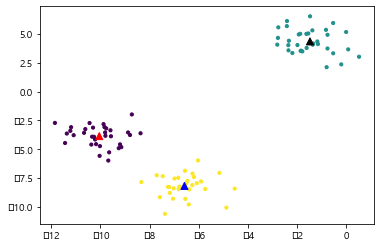

In [71]:
%matplotlib inline

plt.scatter(X[:,0], X[:,1], 
            c = kmeans.labels_, marker="o", s = 10)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1],
           c = ['r','k','b'], marker = "^", s = 50)
plt.show()

### 2) k = 5

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


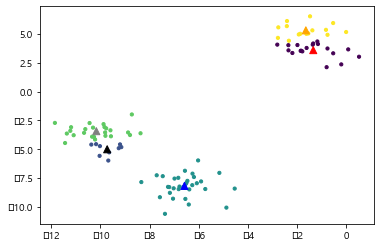

In [72]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X)
assign = kmeans5.labels_
# 시각화
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c = assign, 
            marker="o", s = 10)
plt.scatter(kmeans5.cluster_centers_[:,0], 
            kmeans5.cluster_centers_[:,1],
           c = ['r','k','b', 'gray', 'orange'],
            marker = "^", s = 50)
plt.show()

# [ <u>병합 군집</u> ]

- 시작할 때, 각각의 포인트 하나하나가 클러스터로 지정됨
- 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐 나간다
- 사이킷런의 종료 조건은 클러스터 개수
- linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법 지정

   - ward : 기본값인 ward 연결은 클러스터의 분산을 가장 작게 증가시키는  
     두 클러스터를 합침
     
   - average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터 병합
   
   - complete : 클러스터 포인트 사이의 최대거리가 가장 짧은 두 클러스터 병합

![병합군집](./agglomerative_clustering.png)

In [48]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
import matplotlib.pyplot as plt

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


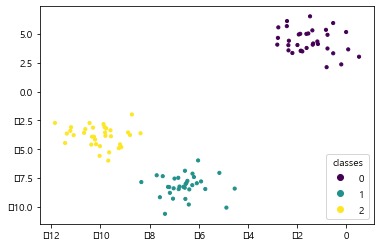

In [73]:
X, y = datasets.make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(X)
%matplotlib inline
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1],
                     c = assign, marker="o", s = 10)
ax.legend(*scatter.legend_elements(), 
          loc='lower right', title = 'classes')


In [ ]:
np.sum(assign == y)/len(y)

#### 계층적 군집과 덴드로그램

- 병합 군집은 계층적 군집을 만듦. 즉, 하나의 작은 클러스터가 군집을  
  진행해 나가면 더 큰 클러스터에 포함되는 형태로 만들어짐
  
![agglomerative](./agglomerative.png)

In [8]:
from scipy.cluster.hierarchy import dendrogram, ward
import seaborn as sns

In [9]:
X, y = datasets.make_blobs(random_state=0, n_samples=12)

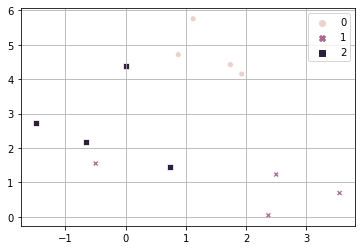

In [10]:
ax = sns.scatterplot(X[:,0],X[:,1], hue = y, style = y)
ax.grid()

In [11]:
import matplotlib as plt

Text(0, 0.5, 'cluster distance')

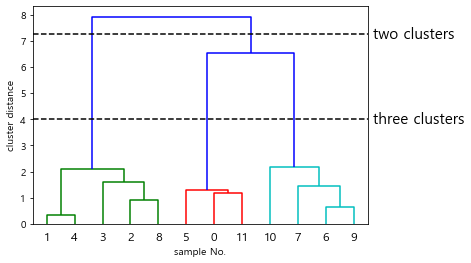

In [127]:
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

ax.text(bounds[1]+2, 7.25, 'two clusters', va='center', 
        fontdict={'size':15})
ax.text(bounds[1]+2, 4, 'three clusters', va='center', 
        fontdict={'size':15})
plt.xlabel('sample No.')
plt.ylabel('cluster distance')

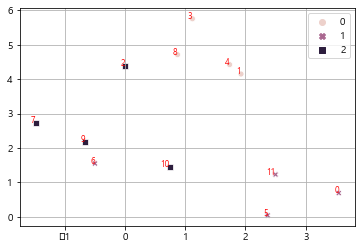

In [55]:
ax = sns.scatterplot(X[:,0],X[:,1], hue = y, style = y)
ax.grid()
for i in range(len(y)):
     ax.text(X[i,0], X[i,1], i, 
             horizontalalignment='right', 
             size='small', color='red')

In [56]:
linkage_array

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

# DBSCAN

- density-based spatial clustering of applications with noise
- 클러스터의 개수를 미리 지정할 필요 없음
- 복잡한 형상도 찾을 수 있으며, 어떤 클래스에도 속하지 않는 포인트를  
  비교적 잘 구분해낸다.
- 병합군집, k-means 보다는 느림

< <u>방법</u> >

- 특성공간에서 가까이 있는 데이터가 많은, 밀도가 높은 지역의 포인트를 찾음
- 데이터 밀집 지역이 한 클러스터를 구성하며, 비교적 비어 있는 지역을 경계로  
  다른 클러스터와 구분된다는 아이디어
- 밀집 지역에 있는 포인트를 핵심 샘플이라고 함
- min_sample, eps 2개의 매개변수
  - 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 만큼 있으면,  
    이 데이터 포인트를 핵심 샘플로 분류
  - eps 거리 안에 min_samples보다 데이터가 적으면 **잡음**으로 분류  
    
- 시작할 때는 무작위로 포인트 선택

In [57]:
from sklearn.cluster import DBSCAN
from sklearn import datasets
import matplotlib.pyplot as plt

In [58]:
X, y = datasets.make_blobs(random_state = 0, n_samples = 12)

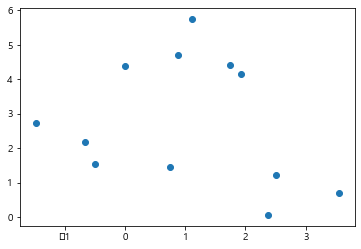

In [59]:
plt.scatter(X[:,0], X[:,1])

In [60]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("cluster label:\n{}".format(clusters))

cluster label:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


-1 잡음

In [61]:
dbscan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [62]:
dbscan1 = DBSCAN(min_samples=2, eps=0.5)
clusters1 = dbscan1.fit_predict(X)
print("cluster label:\n{}".format(clusters1))

cluster label:
[-1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1]


C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


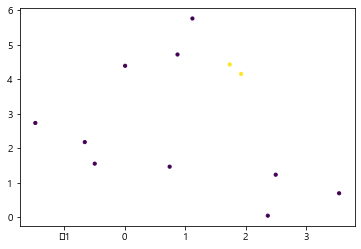

In [63]:
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c = clusters1, marker="o", s = 10)

cluster label:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


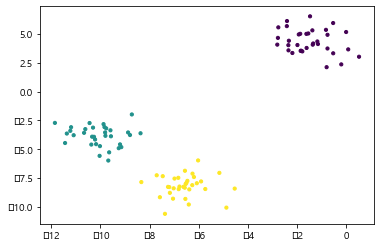

In [75]:
dbscan2 = DBSCAN(min_samples=2, eps=2)
clusters2 = dbscan2.fit_predict(X)
print("cluster label:\n{}".format(clusters2))

%matplotlib inline

plt.scatter(X[:,0], X[:,1], c = clusters2, marker="o", s = 10)

In [76]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import numpy as np

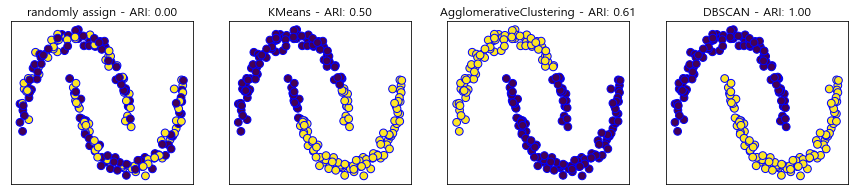

In [77]:
X, y = datasets.make_moons(n_samples=200, noise = 0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 표준화
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4,figsize=(15,3),
                        subplot_kw={'xticks':(), 'yticks':()})

# 사용할 알고리즘 모델의 리스트 작성
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
             DBSCAN()]

# randomly assign에서 ARI=0인 그래프 작성 위해 무작위 클러스터 생성
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2,size=len(X))

# 위에서 생성한 무작위 클러스터 plotting
axes[0].scatter(X_scaled[:,0],X_scaled[:,1], c=random_clusters,
               s=60, edgecolors = 'b')
axes[0].set_title("randomly assign - ARI: {:.2f}".format(\
                                               adjusted_rand_score(y, random_clusters)))
# 3가지 군집 알고리즘 적용한 결과 plotting
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,
              s=60, edgecolors = 'b')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                          adjusted_rand_score(y,clusters)))

In [78]:
from sklearn.metrics import accuracy_score

cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]

print("accuracy: {:.2f}".format(accuracy_score(cluster1, cluster2)))
print("ARI     : {:.2f}".format(adjusted_rand_score(cluster1, cluster2)))

accuracy: 0.00
ARI     : 1.00


### 고유얼굴 특성 추출

In [80]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# 데이터셋에서 최소 20명 이상 데이터만 로드, 이미지 사이즈 줄임(0.7 배)
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [82]:
# 이미지 데이터 shape
people.images.shape

(3023, 87, 65)

In [83]:
# 데이터 shape : 87 * 65
people.data.shape

(3023, 5655)

In [84]:
# 62명에 대한 데이터
len(people['target_names'])

62

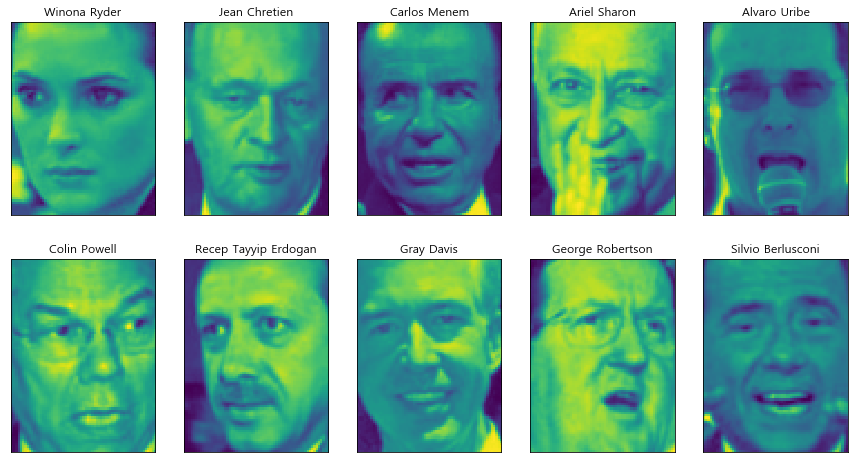

In [86]:
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [87]:
# 첫 10명 레이블 번호와 이름 확인
people.target[0:10], people.target_names[people.target[0:10]]

(array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54], dtype=int64),
 array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
        'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
        'Gray Davis', 'George Robertson', 'Silvio Berlusconi'],
       dtype='<U25'))

In [88]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [89]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

### 데이터의 밸런스를 위해 인물별 30장 까지만 사용

In [90]:
# 30장 까지만 빼내기 위해 불리언 마스크 사용 : 빈 마스크
mask = np.zeros(people.target.shape, dtype=np.bool)
mask

array([False, False, False, ..., False, False, False])

In [91]:
# 0~61번까지 62명
np.unique(people.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

In [92]:
# target 레이블 번호 0인 데이터 인덱스 어레이로 확인
np.where(people.target == 0)[0]

array([  58,   72,   90,  314,  494,  496,  598,  650,  960, 1078, 1212,
       1243, 1265, 1356, 1497, 1586, 1622, 1793, 1803, 1816, 1881, 1952,
       1962, 2003, 2068, 2179, 2183, 2239, 2373, 2441, 2510, 2535, 2622,
       2649, 2651, 2697, 2819, 2960, 2998], dtype=int64)

In [93]:
# 최종 30장까지만 추출 - 조건을 만족하는 mask에 1을 넣어서 True 불리언 인덱싱을 위한 마스크 작성
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:30]] = 1


In [94]:
# 불리언 인덱싱 실시
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정
X_people = X_people / 255.

In [95]:
X_people.data.shape

(1673, 5655)

#### 추출한 원본 데이터를 대상으로 K-nearest Neighbor 분류 실시

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.21


#### < Note >

- 정확도 21%로 62개를 분류하는 문제에서 랜덤 픽(pick)에 비해 매우 우수하지만,  
  아주 좋다고 하기는 어렵다.

#### 추출한 PCA 변환 데이터를 대상으로 K-nearest Neighbor 분류 실시

In [97]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA(n_components=100, whiten = True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1254, 100)


In [108]:
pca1 = PCA(n_components=100).fit(X_train)
X_train_pca1 = pca1.transform(X_train)
X_test_pca1 = pca1.transform(X_test)

print("X_train_pca.shape:", X_train_pca1.shape)

X_train_pca.shape: (1254, 100)


C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GIGABYTE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


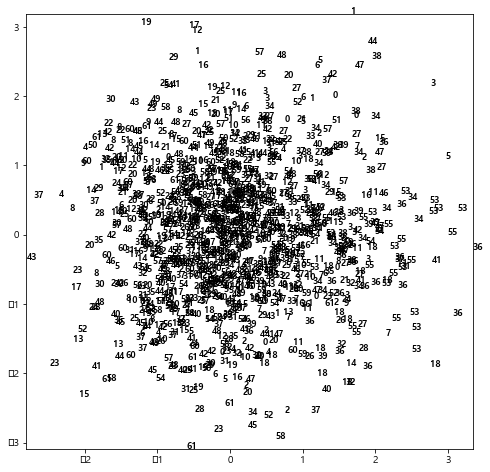

In [109]:
plt.figure(figsize=(8,8))
plt.xlim(X_train_pca[:,0].min(), X_train_pca[:,0].max())
plt.ylim(X_train_pca[:,1].min(), X_train_pca[:,1].max())

for i in range(len(X_train_pca)):
    plt.text(X_train_pca[i,0], X_train_pca[i,1],str(y_train[i]),
            fontdict={'weight':'bold', 'size':9})

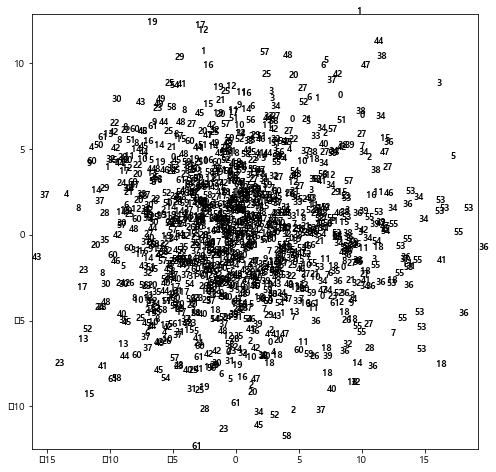

In [110]:
plt.figure(figsize=(8,8))
plt.xlim(X_train_pca1[:,0].min(), X_train_pca1[:,0].max())
plt.ylim(X_train_pca1[:,1].min(), X_train_pca1[:,1].max())
#plt.xlim(-3, 3.5)
#plt.ylim(-3, 3)

for i in range(len(X_train_pca1)):
    plt.text(X_train_pca1[i,0], X_train_pca1[i,1],str(y_train[i]),
            fontdict={'weight':'bold', 'size':9})

In [107]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


#### < Note >

- PCA로 데이터를 변환만 한 것으로도 50% 가량 정확도를 향상 시켰다.
- 하지만, 왜 100개의 주성분인지, 또한 100개의 주성분이 정확히 무엇을 의미하는지  
  명확하게 설명하기 어려운 부분이 있다.